In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.signal import convolve2d

my stuff

In [6]:
def prey_reaction(prey, predator, Diffusion_prey_rate, feed, kernel, delta_t):
    return prey + (Diffusion_prey_rate * convolve2d(prey, kernel, mode="same", boundary = "wrap") - prey * predator ** 2 + feed * (1-prey)) * delta_t #

def predator_reaction(prey, predator, Diffusion_predator_rate, kill, feed, kernel, delta_t):
    return predator + (Diffusion_predator_rate * convolve2d(predator, kernel, mode="same", boundary = "wrap") + prey * predator ** 2 - (kill + feed) * predator) * delta_t  #



    # prey_anim = prey_reaction
    # ax.imshow(prey_reaction, cmap='jet')

In [27]:
class two_d_RD():
    def __init__(self,width,height,Diffusion_prey_rate,Diffusion_predator_rate, kernel, feed, kill, delta_t, number_of_delta_t_iterations, number_of_frames):
        self.width = width
        self.height = height
        self.Dprey = Diffusion_prey_rate
        self.Dpredator = Diffusion_predator_rate
        self.kernel = kernel
        self.feed = feed
        self.kill = kill
        self.delta_t = delta_t
        self.number_of_delta_t_iterations = number_of_delta_t_iterations
        self.number_of_frames = number_of_frames
        self.time = 0

        self.prey_grid = np.ones((height,width)) 
        self.predator_grid = np.zeros((height, width))
        
        num_of_predators = height * width * 0.02
        for i in range(int(num_of_predators)):
            self.predator_grid[np.random.randint(height),np.random.randint(width)] = 1

    @staticmethod
    def prey_reaction(prey, predator, Diffusion_prey_rate, feed, kernel, delta_t):
        return prey + (Diffusion_prey_rate * convolve2d(prey, kernel, mode="same", boundary = "wrap") - prey * predator ** 2 + feed * (1-prey)) * delta_t 
    
    @staticmethod
    def predator_reaction(prey, predator, Diffusion_predator_rate, kill, feed, kernel, delta_t):
        return predator + (Diffusion_predator_rate * convolve2d(predator, kernel, mode="same", boundary = "wrap") + prey * predator ** 2 - (kill + feed) * predator) * delta_t 
    
    def update_grid(self):
        for _ in range(self.number_of_delta_t_iterations):

            prey_grid_new = self.prey_reaction(self.prey_grid, self.predator_grid, self.Dprey, self.feed, self.kernel, self.delta_t)
            predator_grid_new = self.predator_reaction(self.prey_grid, self.predator_grid, self.Dpredator, self.kill, self.feed, self.kernel, self.delta_t)

            self.prey_grid = prey_grid_new
            self.predator_grid = predator_grid_new 

            self.time += self.delta_t
    

    def plot_animation(self):

        fig, ax = plt.subplots()

        def step_animation(t):
            self.update_grid()
            ax.clear()
            ax.imshow(self.prey_grid , cmap='jet')
            ax.set_title("t = {:.2f}".format(self.time))
        
        anim = animation.FuncAnimation(fig, step_animation, frames=np.arange(self.number_of_frames), interval=20)
        anim.save("2d_RD.gif", writer='pillow')
        # plt.show(anim)
    



In [28]:
width, height  =  50, 50
# prey_grid = abs(np.random.rand(width, height)) #prey cells
prey_grid = np.ones((height,width)) 
# predator_grid = abs(np.random.rand(width, height))#np.zeros((width, height)) #predator cells
predator_grid = np.zeros((height,width))
num_of_predators = height * width * 0.02
# np.random.randint(5, size=(2, 4))
for i in range(int(num_of_predators)):
    predator_grid[np.random.randint(height),np.random.randint(width)] = 1



Diffusion_prey_rate = 1
Diffusion_predator_rate = 0.5
kernel = [[0.05,0.2,0.05],
          [0.2,-1,0.2],
          [0.05,0.2,0.05]]
feed = 0.055
kill = 0.062

delta_t = 1e-3
number_of_delta_t_iterations = int(1e2) 
number_of_steps = 150

time = 0


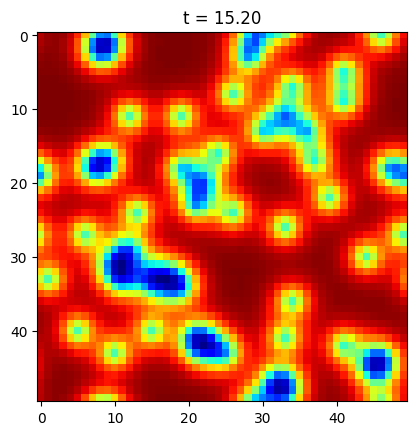

In [29]:
RD = two_d_RD(width, height, Diffusion_prey_rate, Diffusion_predator_rate,kernel,feed, kill, delta_t, number_of_delta_t_iterations, number_of_steps)
RD.plot_animation()